# Exploring Dandiset 001359: Human Patch-Seq Neurophysiology Data

**⚠️ DISCLAIMER: This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results. ⚠️**

## Overview

This notebook explores Dandiset 001359 (version 0.250401.1603), which contains human patch-seq neurophysiology data from the Allen Institute for Brain Science. The dataset includes intracellular electrophysiology recordings from human brain tissue samples.

Dandiset 001359 is available at: [https://dandiarchive.org/dandiset/001359/0.250401.1603](https://dandiarchive.org/dandiset/001359/0.250401.1603)

This dataset is part of the Human Multiple Brain Areas (HMBA) Patch-Seq project and contains recordings from human neurons. The data was collected using patch-clamp techniques to characterize the electrophysiological properties of these neurons.

## What this notebook will cover:

1. Loading the Dandiset metadata and listing available assets
2. Examining the structure of an NWB file to understand its contents
3. Loading and visualizing voltage and current clamp recordings
4. Exploring spike data contained in the NWB files
5. Creating visualizations to understand neuronal response properties

## Required Packages

The following packages are required to run this notebook:

- `dandi`: For accessing data from the DANDI archive
- `pynwb`: For working with NWB files
- `h5py`: For handling HDF5 files (used by NWB)
- `remfile`: For remote file access
- `numpy`: For numerical operations
- `matplotlib`: For visualization
- `pandas`: For data manipulation
- `seaborn`: For enhanced visualizations

In [1]:
# Import required packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import h5py
import remfile
import pynwb
from dandi.dandiapi import DandiAPIClient
from itertools import islice

# Set up plotting parameters
sns.set_theme()

## Loading the Dandiset

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001359", "0.250401.1603")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Description: {metadata.get('description', 'No description available')}")

# Handle contributors, which might be a list of dictionaries or strings
contributors = metadata.get('contributor', ['None listed'])
if contributors and isinstance(contributors[0], dict):
    contributors = [c.get('name', str(c)) if isinstance(c, dict) else str(c) for c in contributors]
print(f"Contributors: {', '.join(contributors)}")

# Handle license, which might be a list
licenses = metadata.get('license', ['None specified'])
if not isinstance(licenses, list):
    licenses = [str(licenses)]
print(f"License: {', '.join(licenses)}")

# Handle keywords, which might be a list of dictionaries or strings
keywords = metadata.get('keywords', ['None listed'])
if keywords and isinstance(keywords[0], dict):
    keywords = [k.get('name', str(k)) if isinstance(k, dict) else str(k) for k in keywords]
print(f"Keywords: {', '.join(keywords)}")

Dandiset name: 20250331_AIBS_Patchseq_human
Dandiset URL: https://dandiarchive.org/dandiset/001359/0.250401.1603
Description: HMBA Lein PatchSeq upload (human) (Q1 2025)
Contributors: Gonzalez, Limary, Allen Institute for Brain Science, National Institute of Mental Health,  Kalmbach, Brian, Dalley, Rachel, Lein, Ed, Lee, Brian
License: spdx:CC-BY-4.0
Keywords: Patch-seq, human, multimodal


In [3]:
# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")


First 5 assets:
- sub-1203384279/sub-1203384279_ses-1207984257_icephys.nwb (ID: 67dc935f-cbc1-4255-bfbf-b8a3b21dacf9)
- sub-1203384279/sub-1203384279_ses-1207304122_icephys.nwb (ID: 6ea1c410-f443-44ef-a471-41fdf7bc8760)
- sub-1203384279/sub-1203384279_ses-1207262032_icephys.nwb (ID: c269347a-2d4b-4b6a-8b7c-2ef303ff503d)
- sub-1203384279/sub-1203384279_ses-1207418023_icephys.nwb (ID: f9663375-c4d6-4a9a-941f-c93c8a7b333a)
- sub-1203384279/sub-1203384279_ses-1208065964_icephys.nwb (ID: e11626f5-2176-48fc-9c4e-26da02787ba3)


## Exploring an NWB File

We'll examine one of the NWB files from this Dandiset. We'll be looking at:

- Session metadata (recording date, subject information)
- Acquisition data: voltage and current recordings
- Stimulus data: stimulus waveforms
- Processing modules: detected spikes and other processed data

In [4]:
# Load a specific NWB file from the Dandiset
# This is the file we'll be exploring in detail
url = "https://api.dandiarchive.org/api/assets/999beb0e-2641-403c-8e4f-e05ec0485a6a/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.4 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### NWB File Metadata

Let's look at the basic metadata of this NWB file:

In [5]:
# Print basic metadata from the NWB file
print(f"NWB File Session ID: {nwb.session_id}")
print(f"Session Description: {nwb.session_description}")
print(f"Institution: {nwb.institution}")
print(f"Session Start Time: {nwb.session_start_time}")

# Subject information
print("\nSubject Information:")
print(f"  Subject ID: {nwb.subject.subject_id}")
print(f"  Age: {nwb.subject.age}")  # Age is typically in ISO 8601 format
print(f"  Species: {nwb.subject.species}")
print(f"  Sex: {nwb.subject.sex}")

NWB File Session ID: 1214734945
Session Description: PLACEHOLDER
Institution: Allen Institute for Brain Science
Session Start Time: 2022-09-29 18:26:24.746000+00:00

Subject Information:
  Subject ID: 1214619242
  Age: P11315.0D
  Species: Homo sapiens
  Sex: M


### File Structure Overview

NWB files have a hierarchical structure with several main groups:

1. **acquisition**: Raw data recorded during the experiment
2. **stimulus**: Stimulus waveforms used during the experiment
3. **processing**: Processed data derived from raw data
4. **analysis**: Analysis results
5. **intervals**: Time intervals for experimental epochs

Let's explore the contents of each group to understand what data is available.

In [6]:
# Get a summary of acquisition data
print("Acquisition data:")
acq_keys = list(nwb.acquisition.keys())
print(f"  Number of acquisition series: {len(acq_keys)}")
print(f"  First 5 acquisition series: {', '.join(acq_keys[:5])}")

# Check what types of data are in acquisition
acq_types = set(type(nwb.acquisition[k]).__name__ for k in acq_keys)
print(f"  Types of acquisition data: {', '.join(acq_types)}")

Acquisition data:
  Number of acquisition series: 54
  First 5 acquisition series: data_00000_AD0, data_00001_AD0, data_00002_AD0, data_00003_AD0, data_00004_AD0
  Types of acquisition data: CurrentClampSeries, VoltageClampSeries


In [7]:
# Get a summary of stimulus data
print("Stimulus data:")
stim_keys = list(nwb.stimulus.keys())
print(f"  Number of stimulus series: {len(stim_keys)}")
print(f"  First 5 stimulus series: {', '.join(stim_keys[:5])}")

# Check what types of data are in stimulus
stim_types = set(type(nwb.stimulus[k]).__name__ for k in stim_keys)
print(f"  Types of stimulus data: {', '.join(stim_types)}")

Stimulus data:
  Number of stimulus series: 54
  First 5 stimulus series: data_00000_DA0, data_00001_DA0, data_00002_DA0, data_00003_DA0, data_00004_DA0
  Types of stimulus data: VoltageClampStimulusSeries, CurrentClampStimulusSeries


In [8]:
# Get a summary of processing modules
print("Processing modules:")
if hasattr(nwb, 'processing') and len(nwb.processing) > 0:
    proc_keys = list(nwb.processing.keys())
    print(f"  Modules: {', '.join(proc_keys)}")
    
    # Look at what's inside each processing module
    for module_name in proc_keys:
        module = nwb.processing[module_name]
        data_interfaces = list(module.data_interfaces.keys())
        print(f"  - {module_name}: {len(data_interfaces)} data interfaces")
        print(f"    First 5 interfaces: {', '.join(data_interfaces[:5])}")
else:
    print("  No processing modules found")

Processing modules:
  Modules: spikes
  - spikes: 20 data interfaces
    First 5 interfaces: Sweep_20, Sweep_21, Sweep_22, Sweep_23, Sweep_24


In [9]:
# Get a summary of intervals data
print("Intervals (experimental epochs):")
if hasattr(nwb, 'intervals') and len(nwb.intervals) > 0:
    intervals_keys = list(nwb.intervals.keys())
    print(f"  Interval types: {', '.join(intervals_keys)}")
    
    # Look at epochs
    if 'epochs' in nwb.intervals:
        epochs_df = nwb.intervals['epochs'].to_dataframe().head()
        print(f"  Number of epochs: {len(nwb.intervals['epochs'])}")
        print(f"  Epoch columns: {', '.join(nwb.intervals['epochs'].colnames)}")
else:
    print("  No intervals found")

Intervals (experimental epochs):
  Interval types: epochs


  Number of epochs: 515
  Epoch columns: start_time, stop_time, tags, timeseries, treelevel


In [10]:
# Show available icephys electrodes
print("Intracellular Electrodes:")
if hasattr(nwb, 'icephys_electrodes') and len(nwb.icephys_electrodes) > 0:
    electrode_keys = list(nwb.icephys_electrodes.keys())
    print(f"  Number of electrodes: {len(electrode_keys)}")
    print(f"  Electrodes: {', '.join(electrode_keys)}")
    
    # Look at one electrode's details
    electrode = nwb.icephys_electrodes[electrode_keys[0]]
    print(f"\nElectrode details for {electrode_keys[0]}:")
    print(f"  Description: {electrode.description}")
    print(f"  Device: {electrode.device.description}")
else:
    print("  No intracellular electrodes found")

Intracellular Electrodes:
  Number of electrodes: 1
  Electrodes: electrode_0

Electrode details for electrode_0:
  Description: Headstage 0
  Device: Harvard Bioscience (formerly HEKA/Instrutech) Model: ITC18USB


### Examining Acquisition Data

Let's look more closely at the acquisition data. The acquisition group contains the raw electrophysiological recordings. First, we'll check what types of recordings are present and then examine their properties.

In [11]:
# Categorize acquisition series by type
acq = nwb.acquisition
current_clamp_series = [k for k in acq.keys() if isinstance(acq[k], pynwb.icephys.CurrentClampSeries)]
voltage_clamp_series = [k for k in acq.keys() if isinstance(acq[k], pynwb.icephys.VoltageClampSeries)]

print(f"Number of CurrentClampSeries: {len(current_clamp_series)}")
print(f"Number of VoltageClampSeries: {len(voltage_clamp_series)}")

Number of CurrentClampSeries: 49
Number of VoltageClampSeries: 5


In [12]:
# Function to get information about a data series
def get_series_info(series):
    info = {
        "type": type(series).__name__,
        "starting_time": series.starting_time,
        "unit": series.unit,
        "data_shape": series.data.shape,
        "stimulus_description": series.stimulus_description if hasattr(series, "stimulus_description") else "N/A"
    }
    return info

# Get information about the first few series
print("Current Clamp Series Information:")
for i, key in enumerate(current_clamp_series[:3]):  # First 3 current clamp series
    series = acq[key]
    info = get_series_info(series)
    print(f"\n{i+1}. {key}:")
    for k, v in info.items():
        print(f"  {k}: {v}")

print("\nVoltage Clamp Series Information:")
for i, key in enumerate(voltage_clamp_series[:3]):  # First 3 voltage clamp series
    series = acq[key]
    info = get_series_info(series)
    print(f"\n{i+1}. {key}:")
    for k, v in info.items():
        print(f"  {k}: {v}")

Current Clamp Series Information:

1. data_00004_AD0:
  type: CurrentClampSeries
  starting_time: 510.0290002822876
  unit: volts
  data_shape: (307622,)
  stimulus_description: X0NRMP_DA_0

2. data_00005_AD0:
  type: CurrentClampSeries
  starting_time: 536.0010004043579
  unit: volts
  data_shape: (182622,)
  stimulus_description: X1PS_SubThresh_DA_0

3. data_00006_AD0:
  type: CurrentClampSeries
  starting_time: 538.8970003128052
  unit: volts
  data_shape: (182622,)
  stimulus_description: X1PS_SubThresh_DA_0

Voltage Clamp Series Information:

1. data_00000_AD0:
  type: VoltageClampSeries
  starting_time: 8.182000160217285
  unit: amperes
  data_shape: (161000,)
  stimulus_description: EXTPSMOKET180424_DA_0

2. data_00001_AD0:
  type: VoltageClampSeries
  starting_time: 282.73900032043457
  unit: amperes
  data_shape: (161000,)
  stimulus_description: EXTPINBATH180424_DA_0

3. data_00002_AD0:
  type: VoltageClampSeries
  starting_time: 351.4210000038147
  unit: amperes
  data_shape

### Examining Stimuli

Now let's look at the stimulation protocols used during the recordings. The stimulus group contains the waveforms that were applied to the cell during recording.

In [13]:
# Categorize stimulus series by type
stim = nwb.stimulus
current_stim_series = [k for k in stim.keys() if isinstance(stim[k], pynwb.icephys.CurrentClampStimulusSeries)]
voltage_stim_series = [k for k in stim.keys() if isinstance(stim[k], pynwb.icephys.VoltageClampStimulusSeries)]

print(f"Number of CurrentClampStimulusSeries: {len(current_stim_series)}")
print(f"Number of VoltageClampStimulusSeries: {len(voltage_stim_series)}")

Number of CurrentClampStimulusSeries: 49
Number of VoltageClampStimulusSeries: 5


In [14]:
# Get information about the first few stimulus series
print("Current Clamp Stimulus Series Information:")
for i, key in enumerate(current_stim_series[:3]):  # First 3 current stimulus series
    series = stim[key]
    info = get_series_info(series)
    print(f"\n{i+1}. {key}:")
    for k, v in info.items():
        print(f"  {k}: {v}")

print("\nVoltage Clamp Stimulus Series Information:")
for i, key in enumerate(voltage_stim_series[:3]):  # First 3 voltage stimulus series
    series = stim[key]
    info = get_series_info(series)
    print(f"\n{i+1}. {key}:")
    for k, v in info.items():
        print(f"  {k}: {v}")

Current Clamp Stimulus Series Information:

1. data_00004_DA0:
  type: CurrentClampStimulusSeries
  starting_time: 510.0290002822876
  unit: amperes
  data_shape: (307622,)
  stimulus_description: X0NRMP_DA_0

2. data_00005_DA0:
  type: CurrentClampStimulusSeries
  starting_time: 536.0010004043579
  unit: amperes
  data_shape: (182622,)
  stimulus_description: X1PS_SubThresh_DA_0

3. data_00006_DA0:
  type: CurrentClampStimulusSeries
  starting_time: 538.8970003128052
  unit: amperes
  data_shape: (182622,)
  stimulus_description: X1PS_SubThresh_DA_0

Voltage Clamp Stimulus Series Information:

1. data_00000_DA0:
  type: VoltageClampStimulusSeries
  starting_time: 8.182000160217285
  unit: volts
  data_shape: (161000,)
  stimulus_description: EXTPSMOKET180424_DA_0

2. data_00001_DA0:
  type: VoltageClampStimulusSeries
  starting_time: 282.73900032043457
  unit: volts
  data_shape: (161000,)
  stimulus_description: EXTPINBATH180424_DA_0

3. data_00002_DA0:
  type: VoltageClampStimulusSe

## Visualizing Electrophysiology Data

Now let's visualize some of the electrophysiology data. We'll explore both voltage and current clamp recordings.

### Plotting a Voltage Clamp Recording

Voltage clamp recordings hold the membrane potential constant and measure the current required to maintain that voltage. Let's plot one of these recordings.

Plotting voltage clamp recording: data_00000_AD0
Description: EXTPSMOKET180424_DA_0
Start time: 8.182000160217285 seconds
Data shape: (161000,)
Unit: amperes


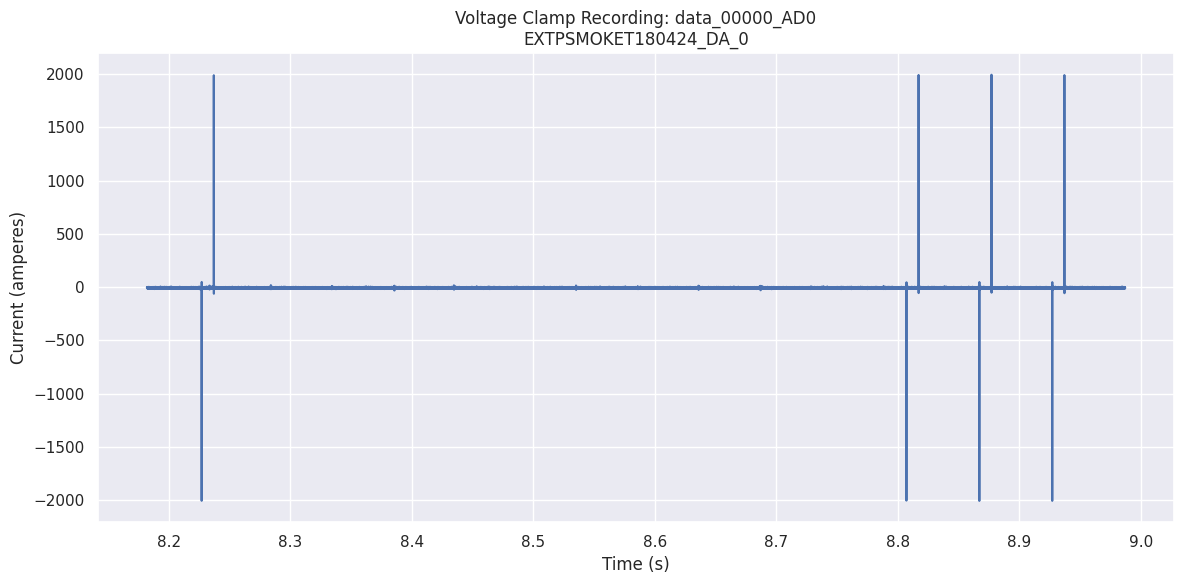

In [15]:
# Plot a voltage clamp recording - selecting a specific series
voltage_clamp_key = voltage_clamp_series[0]  # Using the first voltage clamp series
voltage_clamp_data = nwb.acquisition[voltage_clamp_key]

print(f"Plotting voltage clamp recording: {voltage_clamp_key}")
print(f"Description: {voltage_clamp_data.stimulus_description}")
print(f"Start time: {voltage_clamp_data.starting_time} seconds")
print(f"Data shape: {voltage_clamp_data.data.shape}")
print(f"Unit: {voltage_clamp_data.unit}")

# Let's plot a subset of the data to avoid loading the entire dataset
# Get the sampling rate
if hasattr(voltage_clamp_data, 'rate') and voltage_clamp_data.rate is not None:
    sampling_rate = voltage_clamp_data.rate
else:
    # If rate isn't available directly, we'll use 20 kHz as an estimate for patch-clamp recordings
    sampling_rate = 20000  # 20 kHz is a common sampling rate for patch-clamp

# Load a 1-second segment of data (adjust the range as needed)
start_index = 0
duration_sec = 1.0  # 1 second of data
num_samples = int(duration_sec * sampling_rate)
end_index = min(start_index + num_samples, voltage_clamp_data.data.shape[0])

# Create a time vector (in seconds)
time = voltage_clamp_data.starting_time + np.arange(end_index - start_index) / sampling_rate
current = voltage_clamp_data.data[start_index:end_index]

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(time, current, 'b-')
plt.xlabel('Time (s)')
plt.ylabel(f'Current ({voltage_clamp_data.unit})')
plt.title(f'Voltage Clamp Recording: {voltage_clamp_key}\n{voltage_clamp_data.stimulus_description}')
plt.grid(True)
plt.tight_layout()
plt.show()

### Plotting a Current Clamp Recording

Current clamp recordings inject current into the cell and measure the resulting voltage response. This is useful for studying neuronal excitability and action potential firing.

Plotting current clamp recording: data_00004_AD0
Description: X0NRMP_DA_0
Start time: 510.0290002822876 seconds
Data shape: (307622,)
Unit: volts


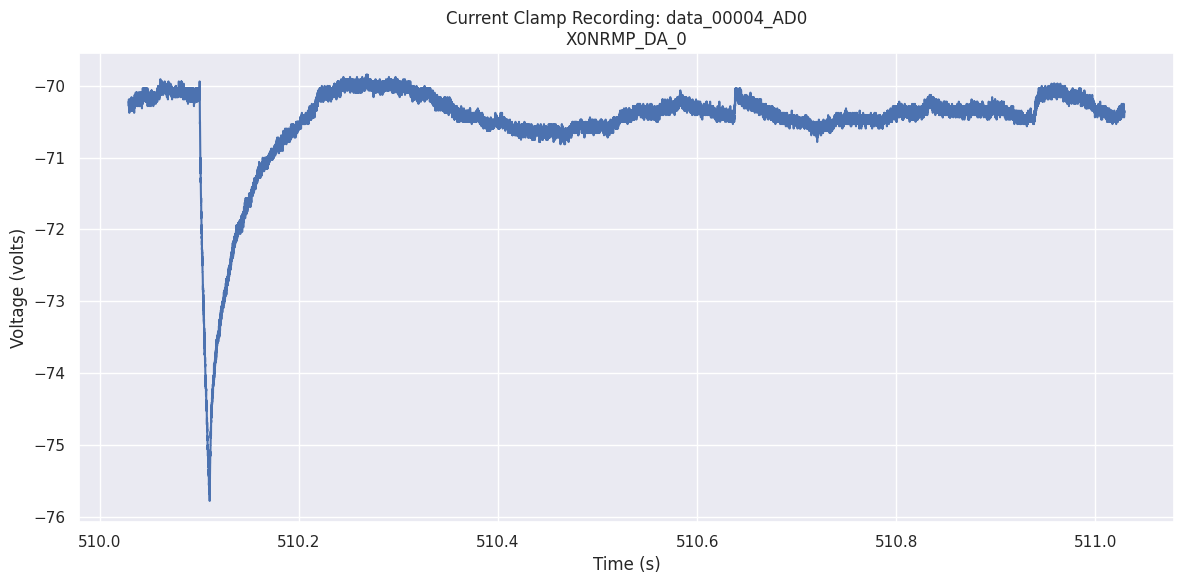

In [16]:
# Plot a current clamp recording - selecting a specific series
current_clamp_key = current_clamp_series[0]  # Using the first current clamp series
current_clamp_data = nwb.acquisition[current_clamp_key]

print(f"Plotting current clamp recording: {current_clamp_key}")
print(f"Description: {current_clamp_data.stimulus_description}")
print(f"Start time: {current_clamp_data.starting_time} seconds")
print(f"Data shape: {current_clamp_data.data.shape}")
print(f"Unit: {current_clamp_data.unit}")

# Same approach as above for current clamp data
# Get the sampling rate
if hasattr(current_clamp_data, 'rate') and current_clamp_data.rate is not None:
    sampling_rate = current_clamp_data.rate
else:
    sampling_rate = 20000  # 20 kHz is a common sampling rate for patch-clamp

# Load a segment of data
start_index = 0
duration_sec = 1.0  # 1 second of data
num_samples = int(duration_sec * sampling_rate)
end_index = min(start_index + num_samples, current_clamp_data.data.shape[0])

# Create a time vector (in seconds)
time = current_clamp_data.starting_time + np.arange(end_index - start_index) / sampling_rate
voltage = current_clamp_data.data[start_index:end_index]

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(time, voltage, 'b-')
plt.xlabel('Time (s)')
plt.ylabel(f'Voltage ({current_clamp_data.unit})')
plt.title(f'Current Clamp Recording: {current_clamp_key}\n{current_clamp_data.stimulus_description}')
plt.grid(True)
plt.tight_layout()
plt.show()

### Comparing a Stimulus with Response

It's often insightful to compare the stimulus applied to a neuron with its response. Let's find a corresponding stimulus-response pair and plot them together.

Found matching stimulus-response pair: data_00004_AD0 and data_00004_DA0
Response type: CurrentClampSeries
Stimulus type: CurrentClampStimulusSeries
Response shape: (307622,)
Stimulus shape: (307622,)


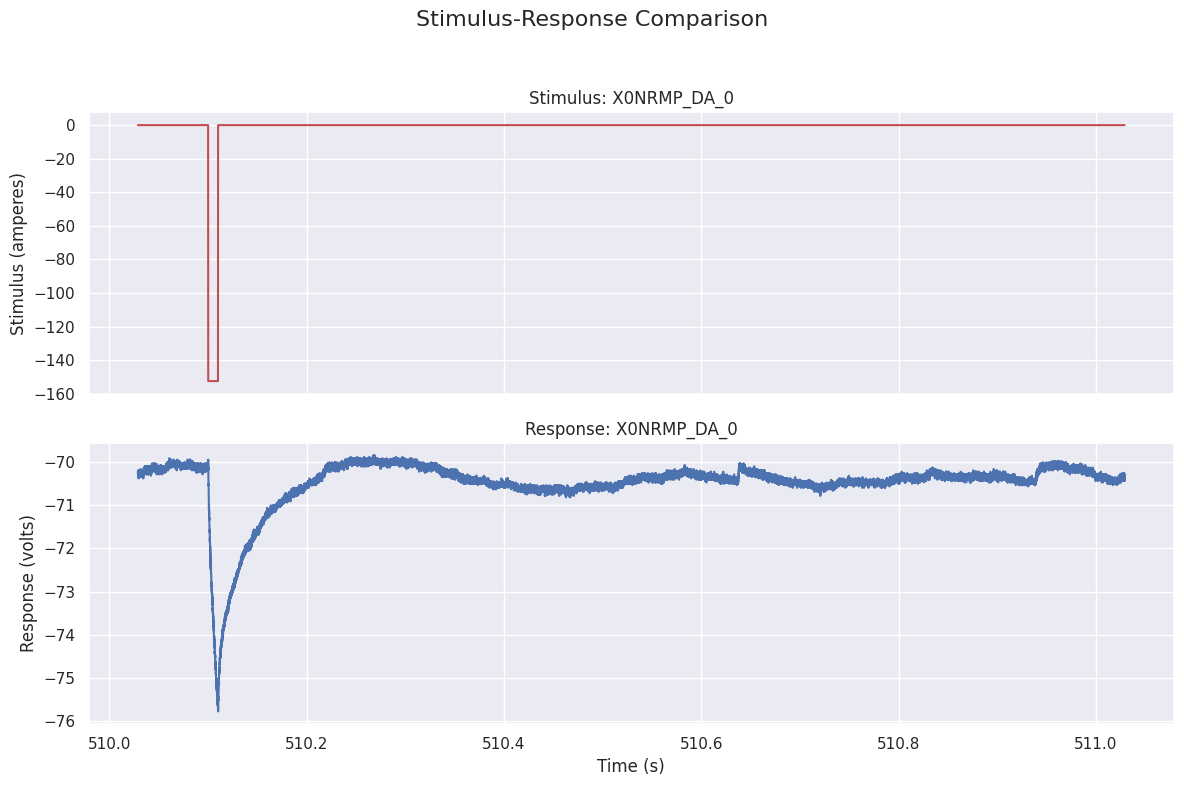

In [17]:
# Find a stimulus-response pair
# We'll look for a current clamp recording and its corresponding stimulus
# Typically, the stimulus and response have similar names and stimulus descriptions

# Find a stimulus-response pair for current clamp
cc_name = current_clamp_series[0]  # Example: data_00004_AD0
cc_stim_name = cc_name.replace('_AD0', '_DA0')  # Corresponding stimulus: data_00004_DA0

# Check if we have this stimulus
if cc_stim_name in stim:
    print(f"Found matching stimulus-response pair: {cc_name} and {cc_stim_name}")
    
    # Get the data
    response = nwb.acquisition[cc_name]
    stimulus = nwb.stimulus[cc_stim_name]
    
    print(f"Response type: {type(response).__name__}")
    print(f"Stimulus type: {type(stimulus).__name__}")
    print(f"Response shape: {response.data.shape}")
    print(f"Stimulus shape: {stimulus.data.shape}")
    
    # Load a segment of the data
    if hasattr(response, 'rate') and response.rate is not None:
        sampling_rate = response.rate
    else:
        sampling_rate = 20000
    
    # To ensure we're looking at the same time window, we need to account for starting times
    start_time_sec = max(response.starting_time, stimulus.starting_time)
    duration_sec = 1.0  # 1 second of data
    
    # Calculate indices
    response_start_idx = int((start_time_sec - response.starting_time) * sampling_rate)
    stimulus_start_idx = int((start_time_sec - stimulus.starting_time) * sampling_rate)
    
    num_samples = int(duration_sec * sampling_rate)
    response_end_idx = min(response_start_idx + num_samples, response.data.shape[0])
    stimulus_end_idx = min(stimulus_start_idx + num_samples, stimulus.data.shape[0])
    
    # Actual duration we can plot
    actual_samples = min(response_end_idx - response_start_idx, stimulus_end_idx - stimulus_start_idx)
    
    # Create time vectors
    time = start_time_sec + np.arange(actual_samples) / sampling_rate
    response_data = response.data[response_start_idx:response_start_idx+actual_samples]
    stimulus_data = stimulus.data[stimulus_start_idx:stimulus_start_idx+actual_samples]
    
    # Plot stimulus and response together
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    
    # Plot stimulus
    ax1.plot(time, stimulus_data, 'r-')
    ax1.set_ylabel(f'Stimulus ({stimulus.unit})')
    ax1.set_title(f'Stimulus: {stimulus.stimulus_description}')
    ax1.grid(True)
    
    # Plot response
    ax2.plot(time, response_data, 'b-')
    ax2.set_xlabel('Time (s)')
    ax2.set_ylabel(f'Response ({response.unit})')
    ax2.set_title(f'Response: {response.stimulus_description}')
    ax2.grid(True)
    
    plt.suptitle('Stimulus-Response Comparison', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for the suptitle
    plt.show()
else:
    print("Could not find a matching stimulus-response pair with the expected naming convention.")
    # Let's try an alternative approach - look for a stimulus-response pair with the same start time
    
    # Get starting times for current clamp recordings
    cc_series = {k: nwb.acquisition[k].starting_time for k in current_clamp_series}
    
    # Get starting times for current clamp stimuli
    cc_stim_series = {k: nwb.stimulus[k].starting_time for k in current_stim_series}
    
    # Find matching pairs
    for cc_key, cc_time in cc_series.items():
        for stim_key, stim_time in cc_stim_series.items():
            if abs(cc_time - stim_time) < 0.01:  # If times are within 10ms
                print(f"Found matching pair based on timing: {cc_key} and {stim_key}")
                print(f"  Response starts at: {cc_time}")
                print(f"  Stimulus starts at: {stim_time}")
                
                # Pick the first match and visualize
                response = nwb.acquisition[cc_key]
                stimulus = nwb.stimulus[stim_key]
                
                # Same plotting code as above...
                if hasattr(response, 'rate') and response.rate is not None:
                    sampling_rate = response.rate
                else:
                    sampling_rate = 20000
                
                # Calculate indices directly
                start_samples = 0
                duration_sec = 1.0
                num_samples = int(duration_sec * sampling_rate)
                
                # Make sure we don't go out of bounds
                actual_samples = min(num_samples, response.data.shape[0], stimulus.data.shape[0])
                
                # Create time vectors
                time = cc_time + np.arange(actual_samples) / sampling_rate
                response_data = response.data[start_samples:start_samples+actual_samples]
                stimulus_data = stimulus.data[start_samples:start_samples+actual_samples]
                
                # Plot
                fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
                
                # Plot stimulus
                ax1.plot(time, stimulus_data, 'r-')
                ax1.set_ylabel(f'Stimulus ({stimulus.unit})')
                ax1.set_title(f'Stimulus: {stimulus.stimulus_description}')
                ax1.grid(True)
                
                # Plot response
                ax2.plot(time, response_data, 'b-')
                ax2.set_xlabel('Time (s)')
                ax2.set_ylabel(f'Response ({response.unit})')
                ax2.set_title(f'Response: {response.stimulus_description}')
                ax2.grid(True)
                
                plt.suptitle('Stimulus-Response Comparison', fontsize=16)
                plt.tight_layout(rect=[0, 0, 1, 0.95])
                plt.show()
                
                # Just show the first match
                break
            
        if 'response_data' in locals():  # If we found a match and plotted it, break the outer loop too
            break
    if 'response_data' not in locals():
        print("Could not find any matching stimulus-response pairs.")

### Exploring Spike Data

The NWB file also contains information about detected spikes in the "spikes" processing module. Let's examine and visualize this data.

In [18]:
# Check if we have spike data
if "spikes" in nwb.processing:
    spikes_module = nwb.processing["spikes"]
    print(f"Spike module description: {spikes_module.description}")
    
    # Get the list of sweep data
    sweep_keys = list(spikes_module.data_interfaces.keys())
    print(f"Number of sweeps with spike data: {len(sweep_keys)}")
    print(f"First few sweeps: {', '.join(sweep_keys[:5])}")
    
    # Look at the first few sweeps with detected spikes
    for i, sweep_key in enumerate(sweep_keys[:5]):
        sweep = spikes_module.data_interfaces[sweep_key]
        spike_times = sweep.timestamps[:]
        
        print(f"\nSweep {sweep_key}:")
        print(f"  Number of spikes: {len(spike_times)}")
        if len(spike_times) > 0:
            print(f"  First few spike times (s): {', '.join(map(str, spike_times[:5]))}")
else:
    print("No spike data found in the processing module.")

Spike module description: detected spikes
Number of sweeps with spike data: 20
First few sweeps: Sweep_20, Sweep_21, Sweep_22, Sweep_23, Sweep_24

Sweep Sweep_20:
  Number of spikes: 1
  First few spike times (s): 0.68446

Sweep Sweep_21:
  Number of spikes: 1
  First few spike times (s): 0.58022

Sweep Sweep_22:
  Number of spikes: 2
  First few spike times (s): 0.56726, 1.3553199999999999

Sweep Sweep_23:
  Number of spikes: 2
  First few spike times (s): 0.5559999999999999, 0.87518

Sweep Sweep_24:
  Number of spikes: 4
  First few spike times (s): 0.54826, 0.6958799999999999, 0.9427, 1.2622200000000001


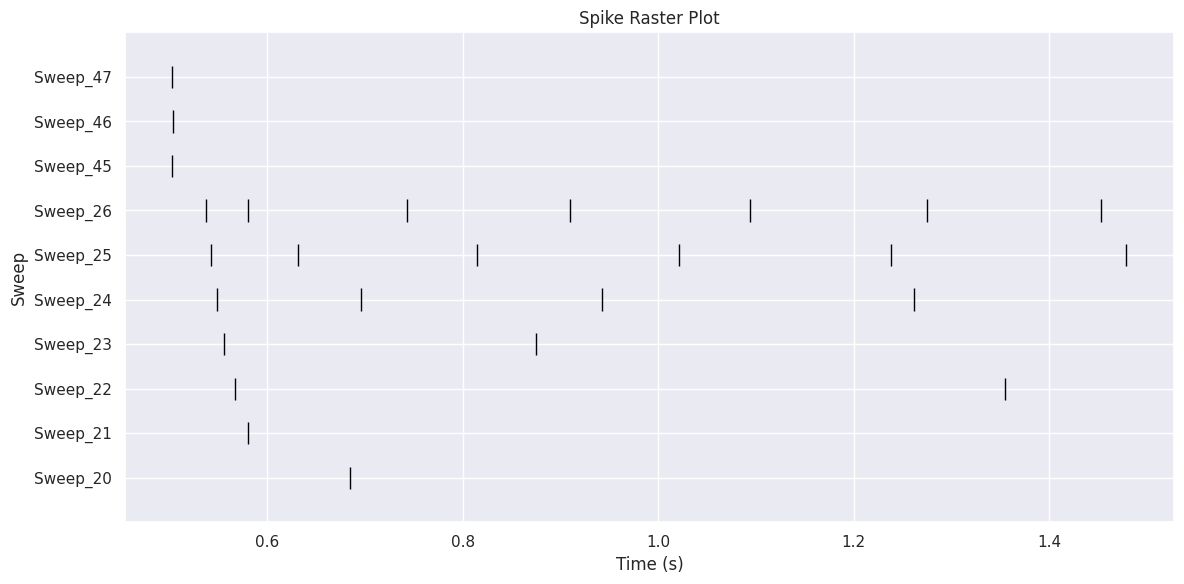

Looking for response data for Sweep_20 (sweep number: 20)
Found matching response data: data_00020_AD0
Could not extract sweep number from Sweep_20


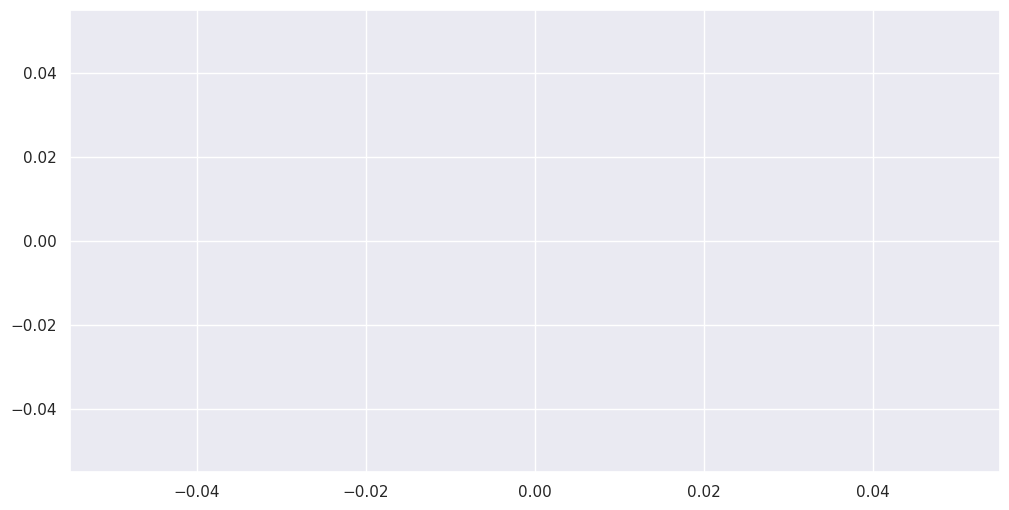

In [19]:
# Plot spike raster for several sweeps
if "spikes" in nwb.processing:
    spikes_module = nwb.processing["spikes"]
    sweep_keys = list(spikes_module.data_interfaces.keys())
    
    # Select sweeps that have spikes (more interesting to visualize)
    non_empty_sweeps = []
    for sweep_key in sweep_keys:
        sweep = spikes_module.data_interfaces[sweep_key]
        if len(sweep.timestamps) > 0:
            non_empty_sweeps.append(sweep_key)
    
    # Limit to the first 10 non-empty sweeps
    non_empty_sweeps = non_empty_sweeps[:10]
    
    # Create a raster plot
    if len(non_empty_sweeps) > 0:
        plt.figure(figsize=(12, 6))
        for i, sweep_key in enumerate(non_empty_sweeps):
            sweep = spikes_module.data_interfaces[sweep_key]
            spike_times = sweep.timestamps[:]
            plt.eventplot(spike_times, lineoffsets=i, linelengths=0.5, linewidths=1, color='black')
        
        plt.yticks(range(len(non_empty_sweeps)), non_empty_sweeps)
        plt.xlabel('Time (s)')
        plt.ylabel('Sweep')
        plt.title('Spike Raster Plot')
        plt.grid(True, axis='x')
        plt.tight_layout()
        plt.show()
        
        # For specific sweeps, we can also overlay spike times on the voltage trace
        # Let's pick one of these sweeps and find the corresponding response data
        
        # Extract sweep number from the sweep key (e.g., "Sweep_26" -> 26)
        example_sweep_key = non_empty_sweeps[0]
        try:
            sweep_num = int(example_sweep_key.split('_')[1])
            print(f"Looking for response data for {example_sweep_key} (sweep number: {sweep_num})")
            
            # Try to find a response trace that corresponds to this sweep number
            matching_response = None
            for key in current_clamp_series:
                series = nwb.acquisition[key]
                if hasattr(series, 'sweep_number') and series.sweep_number == sweep_num:
                    matching_response = key
                    break
            
            if matching_response:
                print(f"Found matching response data: {matching_response}")
                response = nwb.acquisition[matching_response]
                
                # Get spike times for this sweep
                spike_times = spikes_module.data_interfaces[example_sweep_key].timestamps[:]
                
                # Load a segment of the response data
                if hasattr(response, 'rate') and response.rate is not None:
                    sampling_rate = response.rate
                else:
                    sampling_rate = 20000
                
                # If the spike times span a wide range, let's show the full range
                if len(spike_times) > 0:
                    min_spike_time = min(spike_times)
                    max_spike_time = max(spike_times)
                    
                    # Adjust for response starting time
                    rel_min_time = min_spike_time - response.starting_time
                    rel_max_time = max_spike_time - response.starting_time
                    
                    # Add a buffer around spikes
                    buffer_sec = 0.2  # 200ms buffer
                    start_time = max(0, rel_min_time - buffer_sec)
                    end_time = min(rel_max_time + buffer_sec, response.data.shape[0]/sampling_rate)
                    
                    # Convert to indices
                    start_idx = int(start_time * sampling_rate)
                    end_idx = int(end_time * sampling_rate)
                    time = response.starting_time + np.arange(start_idx, end_idx) / sampling_rate
                    voltage = response.data[start_idx:end_idx]
                    
                    # Plot voltage trace with spike times
                    plt.figure(figsize=(12, 6))
                    plt.plot(time, voltage, 'b-')
                    
                    # Add markers for spike times
                    spike_y_range = (np.min(voltage), np.max(voltage))
                    for spike_time in spike_times:
                        plt.axvline(x=spike_time, color='r', linestyle='--', alpha=0.5)
                    
                    plt.xlabel('Time (s)')
                    plt.ylabel(f'Voltage ({response.unit})')
                    plt.title(f'Voltage Trace with Detected Spikes - {example_sweep_key}')
                    plt.grid(True)
                    plt.tight_layout()
                    plt.show()
                else:
                    print(f"No spikes detected in {example_sweep_key}")
            else:
                print(f"Could not find matching response data for sweep number {sweep_num}")
        except (ValueError, IndexError):
            print(f"Could not extract sweep number from {example_sweep_key}")
    else:
        print("No sweeps with spike data found.")
else:
    print("No spike data found in the processing module.")

### Exploring Multiple Sweeps

Let's look at a family of current clamp recordings to see how the neuron responds to different stimulus intensities.

Found stimulus family: X1PS_SubThresh_DA_0 with 5 sweeps


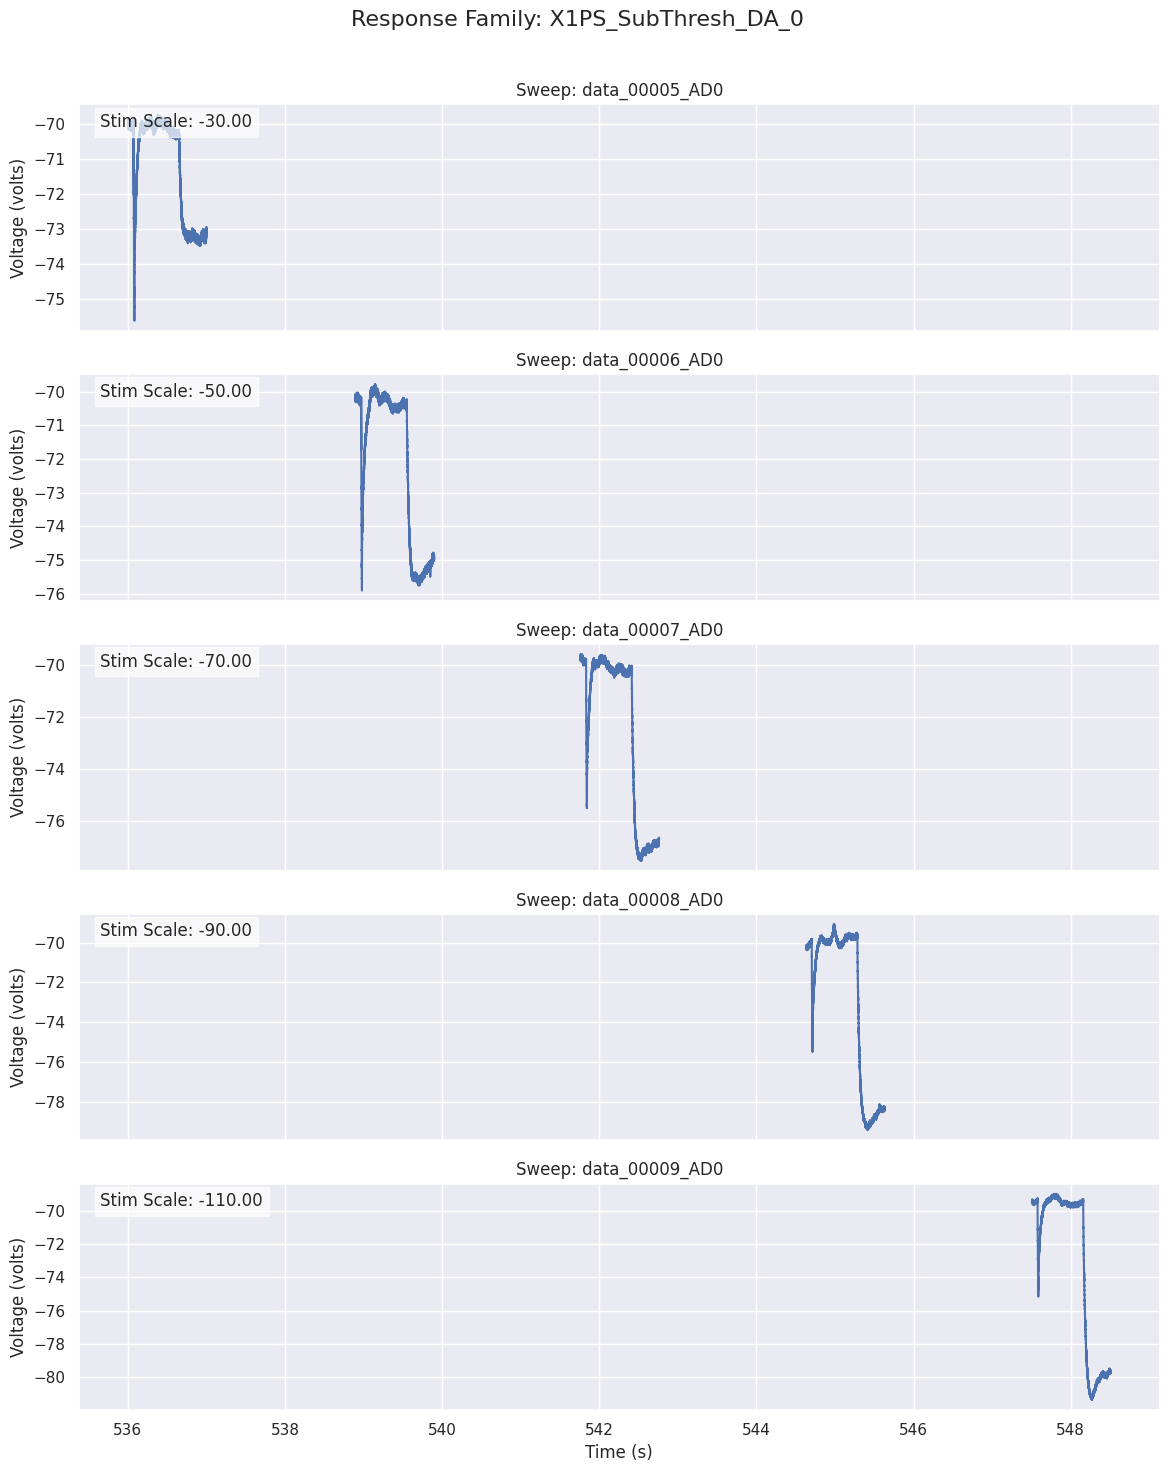

In [20]:
# Let's find a family of current clamp sweeps with the same stimulus type
# First, group by stimulus description
cc_by_stim = {}
for key in current_clamp_series:
    series = nwb.acquisition[key]
    stim_desc = series.stimulus_description
    if stim_desc not in cc_by_stim:
        cc_by_stim[stim_desc] = []
    cc_by_stim[stim_desc].append(key)

# Find a stimulus type with multiple sweeps
for stim_desc, keys in cc_by_stim.items():
    if len(keys) >= 3:  # Let's find one with at least 3 sweeps
        print(f"Found stimulus family: {stim_desc} with {len(keys)} sweeps")
        
        # Let's look at the first few sweeps in this family
        example_keys = keys[:min(5, len(keys))]  # Up to 5 sweeps
        
        # Create a multi-panel plot
        fig, axes = plt.subplots(len(example_keys), 1, figsize=(12, 3 * len(example_keys)), sharex=True)
        
        for i, key in enumerate(example_keys):
            series = nwb.acquisition[key]
            
            # Get sampling rate
            if hasattr(series, 'rate') and series.rate is not None:
                sampling_rate = series.rate
            else:
                sampling_rate = 20000
            
            # Load a segment of data
            duration_sec = 1.0  # 1 second
            num_samples = int(duration_sec * sampling_rate)
            end_idx = min(num_samples, series.data.shape[0])
            
            # Create time vector and get data
            time = series.starting_time + np.arange(end_idx) / sampling_rate
            voltage = series.data[:end_idx]
            
            # Plot this sweep
            axes[i].plot(time, voltage, 'b-')
            axes[i].set_ylabel(f'Voltage ({series.unit})')
            axes[i].set_title(f'Sweep: {key}')
            axes[i].grid(True)
            
            # Add sweep-specific information if available
            if hasattr(series, 'comments'):
                # Try to extract key parameters from comments
                comments = series.comments
                stim_scale = None
                
                # Look for stimulus scale factor in comments
                import re
                match = re.search(r'Stim Scale Factor:\s*([\d.-]+)', comments)
                if match:
                    stim_scale = match.group(1)
                    axes[i].text(0.02, 0.9, f'Stim Scale: {stim_scale}', 
                                transform=axes[i].transAxes, bbox=dict(facecolor='white', alpha=0.7))
        
        # Set common x-label
        axes[-1].set_xlabel('Time (s)')
        
        plt.suptitle(f'Response Family: {stim_desc}', fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust for suptitle
        plt.show()
        
        # Just show the first family we find
        break
    
if not cc_by_stim:
    print("No suitable stimulus families found.")

## Additional Analysis: Comparing Responses Across Different Stimulus Intensities

Now, let's extract some key metrics from the responses to different stimulus intensities and plot how these metrics vary with the stimulus strength.

Analyzing family: X1PS_SubThresh_DA_0 with 5 valid sweeps


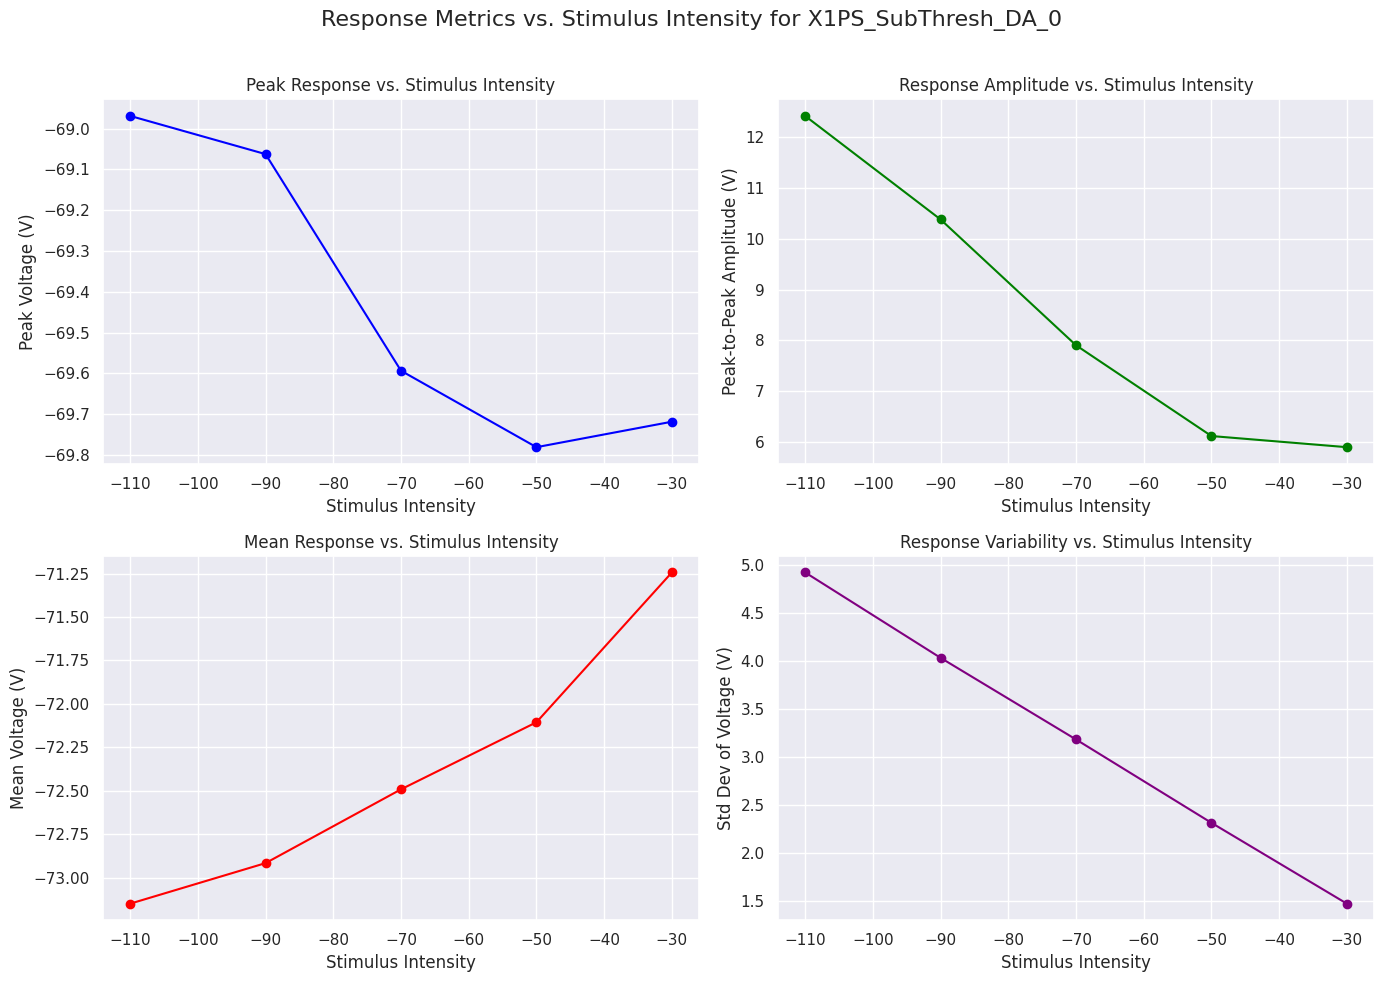

In [21]:
# For a given family of sweeps, extract response metrics vs. stimulus intensity
# We'll look for stimuli that modify a single parameter (like amplitude)

def extract_stim_intensity(series):
    """Extract stimulus intensity from comments if possible"""
    if not hasattr(series, 'comments'):
        return None
    
    import re
    # Look for "Stim Scale Factor:" in the comments
    match = re.search(r'Stim Scale Factor:\s*([-\d.]+)', series.comments)
    if match:
        try:
            return float(match.group(1))
        except ValueError:
            return None
    return None

def calculate_response_metrics(series, sampling_rate=20000):
    """Calculate basic response metrics from a series"""
    # Let's focus on the first second of data
    duration_sec = 1.0
    num_samples = min(int(duration_sec * sampling_rate), series.data.shape[0])
    data = series.data[:num_samples]
    
    metrics = {
        'baseline': np.median(data[:int(0.1 * sampling_rate)]),  # Median of first 100ms
        'peak': np.max(data),
        'trough': np.min(data),
        'mean': np.mean(data),
        'std': np.std(data)
    }
    
    # Calculate peak-to-peak amplitude
    metrics['peak_to_peak'] = metrics['peak'] - metrics['trough']
    
    return metrics

# Find a suitable stimulus family
for stim_desc, keys in cc_by_stim.items():
    if len(keys) >= 5:  # Let's find one with at least 5 sweeps for a good comparison
        # Check if we can extract stimulus intensities for this family
        series_list = [nwb.acquisition[key] for key in keys]
        intensities = [extract_stim_intensity(series) for series in series_list]
        
        # Filter out None values
        valid_pairs = [(series, intensity) for series, intensity in zip(series_list, intensities) if intensity is not None]
        
        if len(valid_pairs) >= 4:  # At least 4 valid intensity-series pairs
            print(f"Analyzing family: {stim_desc} with {len(valid_pairs)} valid sweeps")
            
            # Sort by intensity
            valid_pairs.sort(key=lambda x: x[1])
            
            # Calculate metrics for each series
            metrics_list = []
            
            for series, intensity in valid_pairs:
                # Get sampling rate
                if hasattr(series, 'rate') and series.rate is not None:
                    sampling_rate = series.rate
                else:
                    sampling_rate = 20000
                
                metrics = calculate_response_metrics(series, sampling_rate)
                metrics['intensity'] = intensity
                metrics_list.append(metrics)
            
            # Convert to DataFrame for easier plotting
            import pandas as pd
            metrics_df = pd.DataFrame(metrics_list)
            
            # Plot key metrics vs. intensity
            fig, axes = plt.subplots(2, 2, figsize=(14, 10))
            
            # Plot peak vs. intensity
            axes[0, 0].plot(metrics_df['intensity'], metrics_df['peak'], 'o-', color='blue')
            axes[0, 0].set_xlabel('Stimulus Intensity')
            axes[0, 0].set_ylabel('Peak Voltage (V)')
            axes[0, 0].set_title('Peak Response vs. Stimulus Intensity')
            axes[0, 0].grid(True)
            
            # Plot peak-to-peak vs. intensity
            axes[0, 1].plot(metrics_df['intensity'], metrics_df['peak_to_peak'], 'o-', color='green')
            axes[0, 1].set_xlabel('Stimulus Intensity')
            axes[0, 1].set_ylabel('Peak-to-Peak Amplitude (V)')
            axes[0, 1].set_title('Response Amplitude vs. Stimulus Intensity')
            axes[0, 1].grid(True)
            
            # Plot mean vs. intensity
            axes[1, 0].plot(metrics_df['intensity'], metrics_df['mean'], 'o-', color='red')
            axes[1, 0].set_xlabel('Stimulus Intensity')
            axes[1, 0].set_ylabel('Mean Voltage (V)')
            axes[1, 0].set_title('Mean Response vs. Stimulus Intensity')
            axes[1, 0].grid(True)
            
            # Plot std (variability) vs. intensity
            axes[1, 1].plot(metrics_df['intensity'], metrics_df['std'], 'o-', color='purple')
            axes[1, 1].set_xlabel('Stimulus Intensity')
            axes[1, 1].set_ylabel('Std Dev of Voltage (V)')
            axes[1, 1].set_title('Response Variability vs. Stimulus Intensity')
            axes[1, 1].grid(True)
            
            plt.suptitle(f'Response Metrics vs. Stimulus Intensity for {stim_desc}', fontsize=16)
            plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust for suptitle
            plt.show()
            
            # Just show the first suitable family we find
            break

        else:
            print(f"Family {stim_desc} has insufficient valid intensity data: {len(valid_pairs)} valid pairs")

## Visualize Neuron Response Properties

Let's create a summary of the neuron's properties by looking at several parameters from the data.

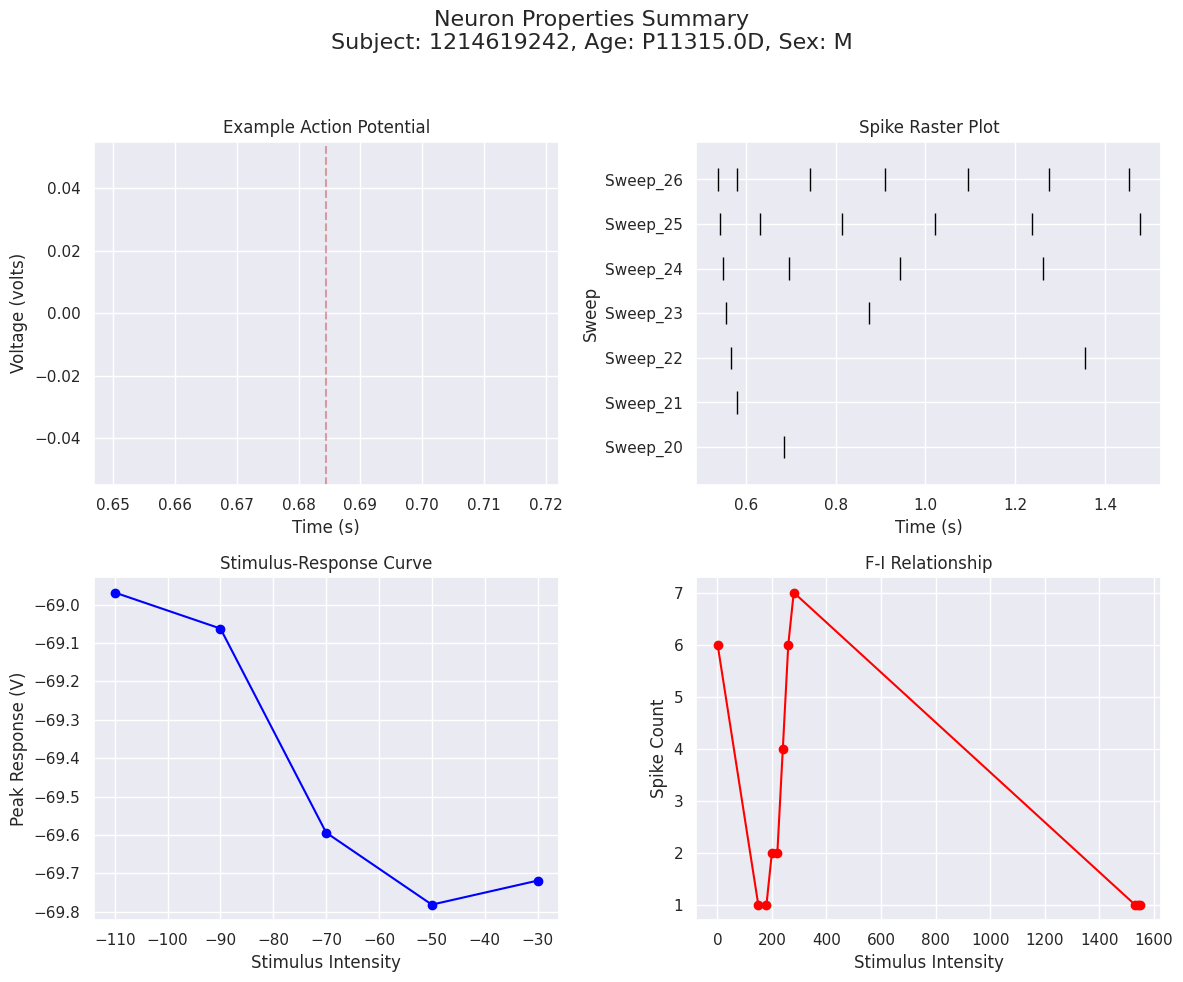

In [22]:
# Let's create a visualization that provides a summary of this neuron's properties

# First, try to find a good example of an action potential
# Look for recordings with spikes in the spike processing module
has_spikes = False
example_ap = None

if "spikes" in nwb.processing:
    spikes_module = nwb.processing["spikes"]
    sweep_keys = list(spikes_module.data_interfaces.keys())
    
    # Find a sweep with at least one spike
    for sweep_key in sweep_keys:
        sweep = spikes_module.data_interfaces[sweep_key]
        spike_times = sweep.timestamps[:]
        
        if len(spike_times) > 0:
            has_spikes = True
            # Try to extract sweep number
            try:
                sweep_num = int(sweep_key.split('_')[1])
                
                # Find corresponding current clamp recording
                for key in current_clamp_series:
                    series = nwb.acquisition[key]
                    if hasattr(series, 'sweep_number') and series.sweep_number == sweep_num:
                        example_ap = {
                            'series': series,
                            'key': key,
                            'spike_times': spike_times
                        }
                        break
                
                if example_ap:
                    break
            except (ValueError, IndexError):
                pass

# Create a summary figure
plt.figure(figsize=(12, 10))

# First, let's show a few representative traces
plt.subplot(2, 2, 1)

if example_ap:
    # Show an action potential
    series = example_ap['series']
    spike_times = example_ap['spike_times']
    
    # Get sampling rate
    if hasattr(series, 'rate') and series.rate is not None:
        sampling_rate = series.rate
    else:
        sampling_rate = 20000
    
    # Find a spike to center on
    spike_time = spike_times[0]
    
    # Extract a window around the spike
    window_sec = 0.05  # 50 ms window (25ms before, 25ms after)
    rel_spike_time = spike_time - series.starting_time
    
    start_time = max(0, rel_spike_time - window_sec/2)
    end_time = min(rel_spike_time + window_sec/2, series.data.shape[0]/sampling_rate)
    
    # Convert to indices
    start_idx = int(start_time * sampling_rate)
    end_idx = int(end_time * sampling_rate)
    
    # Extract data
    window_time = np.arange(end_idx - start_idx) / sampling_rate + (series.starting_time + start_time)
    window_voltage = series.data[start_idx:end_idx]
    
    # Plot the action potential
    plt.plot(window_time, window_voltage, 'b-')
    plt.axvline(x=spike_time, color='r', linestyle='--', alpha=0.5)
    plt.xlabel('Time (s)')
    plt.ylabel(f'Voltage ({series.unit})')
    plt.title('Example Action Potential')
    plt.grid(True)
else:
    # If no clear spike found, show a representative current clamp trace
    if current_clamp_series:
        series = nwb.acquisition[current_clamp_series[0]]
        
        # Get sampling rate
        if hasattr(series, 'rate') and series.rate is not None:
            sampling_rate = series.rate
        else:
            sampling_rate = 20000
        
        # Load a segment of data
        duration_sec = 0.2  # 200ms
        num_samples = min(int(duration_sec * sampling_rate), series.data.shape[0])
        
        # Create time vector and get data
        time = series.starting_time + np.arange(num_samples) / sampling_rate
        voltage = series.data[:num_samples]
        
        # Plot
        plt.plot(time, voltage, 'b-')
        plt.xlabel('Time (s)')
        plt.ylabel(f'Voltage ({series.unit})')
        plt.title('Example Current Clamp Recording')
        plt.grid(True)
    else:
        plt.text(0.5, 0.5, 'No suitable current clamp data found', 
                ha='center', va='center', transform=plt.gca().transAxes)

# Show a raster plot of spikes
plt.subplot(2, 2, 2)

if "spikes" in nwb.processing and len(nwb.processing["spikes"].data_interfaces) > 0:
    spikes_module = nwb.processing["spikes"]
    sweep_keys = list(spikes_module.data_interfaces.keys())
    
    # Select sweeps that have spikes
    non_empty_sweeps = []
    for sweep_key in sweep_keys:
        sweep = spikes_module.data_interfaces[sweep_key]
        if len(sweep.timestamps) > 0:
            non_empty_sweeps.append(sweep_key)
    
    # Limit to a reasonable number
    non_empty_sweeps = non_empty_sweeps[:7]  # Show up to 7 sweeps
    
    # Create a raster plot
    if len(non_empty_sweeps) > 0:
        for i, sweep_key in enumerate(non_empty_sweeps):
            sweep = spikes_module.data_interfaces[sweep_key]
            spike_times = sweep.timestamps[:]
            plt.eventplot(spike_times, lineoffsets=i, linelengths=0.5, linewidths=1, color='black')
        
        plt.yticks(range(len(non_empty_sweeps)), non_empty_sweeps)
        plt.xlabel('Time (s)')
        plt.ylabel('Sweep')
        plt.title('Spike Raster Plot')
        plt.grid(True, axis='x')
    else:
        plt.text(0.5, 0.5, 'No spike data found', 
                ha='center', va='center', transform=plt.gca().transAxes)
else:
    plt.text(0.5, 0.5, 'No spike data found', 
            ha='center', va='center', transform=plt.gca().transAxes)

# Show a stimulus response curve if we have one
plt.subplot(2, 2, 3)

# Try to use the metrics we calculated earlier, or calculate new ones if needed
if 'metrics_df' in locals() and not metrics_df.empty:
    # Use the metrics we already calculated
    plt.plot(metrics_df['intensity'], metrics_df['peak'], 'o-', color='blue')
    plt.xlabel('Stimulus Intensity')
    plt.ylabel('Peak Response (V)')
    plt.title('Stimulus-Response Curve')
    plt.grid(True)
else:
    # Try to calculate a new I-V curve
    # Look for a family of current clamp recordings
    has_iv = False
    
    for stim_desc, keys in cc_by_stim.items():
        if len(keys) >= 3:
            # Check if we can extract stimulus intensities for this family
            series_list = [nwb.acquisition[key] for key in keys]
            intensities = [extract_stim_intensity(series) for series in series_list]
            
            # Filter out None values
            valid_pairs = [(series, intensity) for series, intensity in zip(series_list, intensities) if intensity is not None]
            
            if len(valid_pairs) >= 3:
                # Calculate peak responses
                response_peaks = []
                stim_intensities = []
                
                for series, intensity in valid_pairs:
                    # Get sampling rate
                    if hasattr(series, 'rate') and series.rate is not None:
                        sampling_rate = series.rate
                    else:
                        sampling_rate = 20000
                    
                    # Calculate peak (simple approach)
                    data_segment = series.data[:min(int(0.5 * sampling_rate), len(series.data))]
                    peak = np.max(data_segment)
                    
                    response_peaks.append(peak)
                    stim_intensities.append(intensity)
                
                # Sort by intensity
                sorted_pairs = sorted(zip(stim_intensities, response_peaks))
                intensities_sorted, peaks_sorted = zip(*sorted_pairs)
                
                # Plot
                plt.plot(intensities_sorted, peaks_sorted, 'o-', color='blue')
                plt.xlabel('Stimulus Intensity')
                plt.ylabel('Peak Response (V)')
                plt.title(f'I-V Relationship: {stim_desc}')
                plt.grid(True)
                
                has_iv = True
                break
    
    if not has_iv:
        plt.text(0.5, 0.5, 'Could not determine I-V relationship', 
                ha='center', va='center', transform=plt.gca().transAxes)

# Show a frequency-current relationship (F-I curve)
plt.subplot(2, 2, 4)

# Try to determine spike frequency for different stimulus intensities
has_fi = False

if "spikes" in nwb.processing:
    # For each sweep with spikes, try to match it to a stimulus intensity
    spike_counts = []
    fi_intensities = []
    
    for sweep_key in sweep_keys:
        sweep = spikes_module.data_interfaces[sweep_key]
        spike_times = sweep.timestamps[:]
        
        if len(spike_times) > 0:
            # Try to extract sweep number
            try:
                sweep_num = int(sweep_key.split('_')[1])
                
                # Find corresponding current clamp recording
                for key in current_clamp_series:
                    series = nwb.acquisition[key]
                    if hasattr(series, 'sweep_number') and series.sweep_number == sweep_num:
                        # Try to extract stimulus intensity
                        intensity = extract_stim_intensity(series)
                        
                        if intensity is not None:
                            spike_counts.append(len(spike_times))
                            fi_intensities.append(intensity)
                            break
            except (ValueError, IndexError):
                pass
    
    if len(spike_counts) >= 3:
        # Sort by intensity
        sorted_pairs = sorted(zip(fi_intensities, spike_counts))
        intensities_sorted, counts_sorted = zip(*sorted_pairs)
        
        # Plot
        plt.plot(intensities_sorted, counts_sorted, 'o-', color='red')
        plt.xlabel('Stimulus Intensity')
        plt.ylabel('Spike Count')
        plt.title('F-I Relationship')
        plt.grid(True)
        has_fi = True

if not has_fi:
    plt.text(0.5, 0.5, 'Could not determine F-I relationship', 
            ha='center', va='center', transform=plt.gca().transAxes)

# Add a title with subject information
plt.suptitle(f'Neuron Properties Summary\nSubject: {nwb.subject.subject_id}, Age: {nwb.subject.age}, Sex: {nwb.subject.sex}',
             fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for suptitle
plt.show()

## Summary and Future Directions

In this notebook, we've explored Dandiset 001359, which contains human patch-seq neurophysiology data from the Allen Institute for Brain Science. We've examined the structure of an NWB file, loaded electrophysiological recordings, and visualized various aspects of the data.

### Key findings:

1. The dataset contains intracellular recordings from human neurons, including both voltage clamp and current clamp data.
2. We've visualized raw recordings, spike times, and response properties.
3. We've explored relationships between stimulus intensity and neuronal responses.

### Future directions:

1. **Comprehensive cell type analysis**: Analyze a larger number of cells to identify different cell types based on their electrophysiological properties.
2. **Morphological integration**: Integrate the electrophysiological data with morphological data that might be available.
3. **Transcriptomic correlation**: Since this is patch-seq data, it would be valuable to correlate the electrophysiological properties with gene expression profiles.
4. **Comparative analysis**: Compare human neurons to similar neurons from other species to identify unique features of human neurons.
5. **Disease models**: Investigate how these properties might differ in disease states.

### Tools for deeper analysis:

- Use the [Allen SDK](https://github.com/AllenInstitute/AllenSDK) for more specialized analysis tools.
- Explore interactive visualization with [Neurosift](https://neurosift.app/) by following links like: [https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/999beb0e-2641-403c-8e4f-e05ec0485a6a/download/&dandisetId=001359&dandisetVersion=0.250401.1603](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/999beb0e-2641-403c-8e4f-e05ec0485a6a/download/&dandisetId=001359&dandisetVersion=0.250401.1603)
- Consider applying machine learning techniques to automatically classify neurons based on their electrophysiological signatures.

This notebook provides a starting point for exploring this rich dataset, and there are many more analyses that could be performed depending on specific research interests.